C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/2556929994.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_new,xx2_new,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


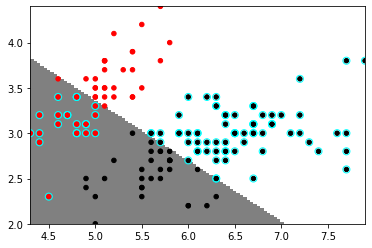

In [36]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data # 입력은 4차원
y = iris.target # 출력은 3 종류

N,D = x.shape

# 입력 2 + 1차원, 출력은 2 class로 줄여서
x0 = np.zeros((N,1))
x1 = x[:,0].reshape(-1,1)
x2 = x[:,1].reshape(-1,1)

y[np.where(y != 0)] = -1 # sample: black, region: gray
y[np.where(y == 0)] = +1 # sample: red, region: white
y = y.reshape(-1,1)

res = 100
x1_new = np.linspace(np.min(x1),np.max(x1),res)
x2_new = np.linspace(np.min(x2),np.max(x2),res)

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

xx1_new,xx2_new = np.meshgrid(x1_new,x2_new)

# bias를 포함
w = np.array([-10, 1.0, 1.5])

# 파라미터랑 입력이랑 내적을 하는데
# 그림에 보여준 전체 영역에서 전부 구한 거
y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
y_pred = w[0] + w[1]*x1 + w[2]*x2
y_pred = y_pred.reshape(-1,1)

# 예측: y_pred
# 정답: y
# 이 두개의 부호가 다른 경우 = 예측이 틀린 경우
id_misclass = np.where(y_pred*y < 0)

plt.figure()
plt.pcolormesh(xx1_new,xx2_new,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/3730145985.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_new,xx2_new,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/3730145985.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = w + eta*y[id_misclass[0]]*np.array([1,x1[id_misclass[0]],x2[id_misclass[0]]])
C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/3730145985.py:37: MatplotlibDeprecationWarning: shading='flat' wh

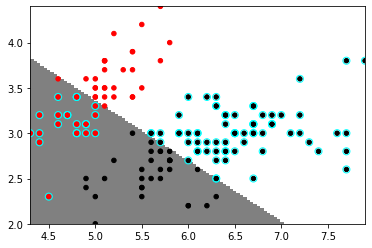

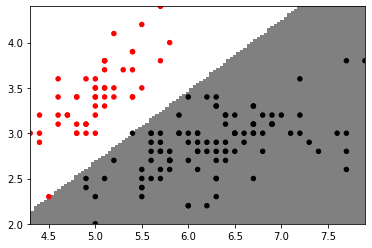

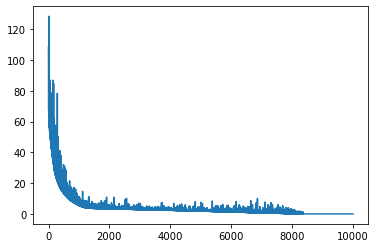

In [37]:
# perceptron, stochastic gradient descent
eta = 0.01
maxIter = 10000
cost = np.zeros(maxIter)
cost[:] = np.nan

# 잘못 분류된 모든 샘플 인덱스가 들어있음
# 그 중에서 한개만 고르려고, 순서를 랜덤으로 섞음
id_misclass = np.where(y_pred*y < 0)
id_misclass = np.random.permutation(id_misclass[0])

# 시작하면서 한번 그림 그리기
y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
plt.figure()
plt.pcolormesh(xx1_new,xx2_new,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

for iter in range(maxIter):
    # 오분류된 샘플 없으면 멈추기
    if id_misclass.size == 0:
        break
        
    # stochastic gradient descent 본체
    w = w + eta*y[id_misclass[0]]*np.array([1,x1[id_misclass[0]],x2[id_misclass[0]]])
    
    # 새 파라미터를 이용한 새 예측값
    y_pred = w[0] + w[1]*x1 + w[2]*x2    
    
    # 오분류된 샘플 다시 고르고 섞기
    id_misclass = np.where(y_pred*y < 0)
    id_misclass = np.random.permutation(id_misclass[0])
    
    # 이번 iteration에서 cost 구하기
    cost[iter] = -np.sum(y_pred[id_misclass]*y[id_misclass])

# 다 끝나고 그림 그리기
y_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
plt.figure()
plt.pcolormesh(xx1_new,xx2_new,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

plt.figure()
plt.plot(cost)

C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/2178944601.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


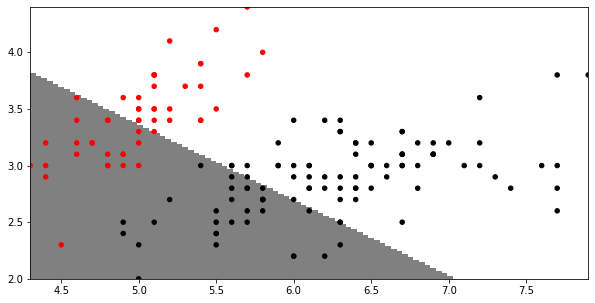

In [38]:
# logistic regression

# sigmoid 함수가 필요
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

t = np.copy(y)
t[np.where(t < 0)] = 0 # sample: black, region: gray
t[np.where(t > 0)] = +1 # sample: red, region: white
t = t.reshape(-1,1)

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

# a = theta * input x
# y = sigmoid(a)
w = np.array([-10, 1.0, 1.5])

# 예측
a_pred = w[0] + w[1]*x1 + w[2]*x2
y_pred = sigmoid(a_pred)

# 그림 그리기용
a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
y_new = sigmoid(a_new)

plt.figure(figsize = (10,5))
plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/4091062597.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
C:\Users\jacob\AppData\Local\Temp/ipykernel_19244/4091062597.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


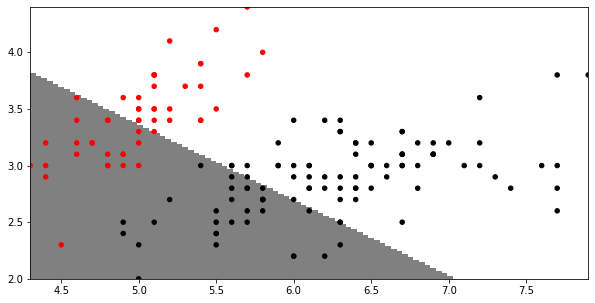

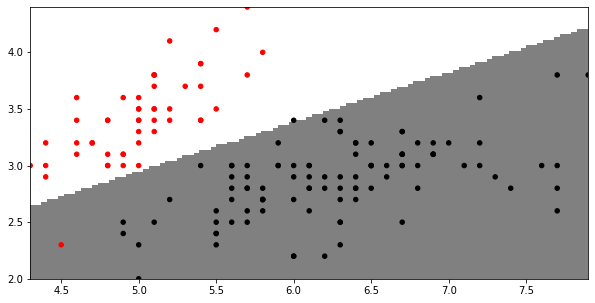

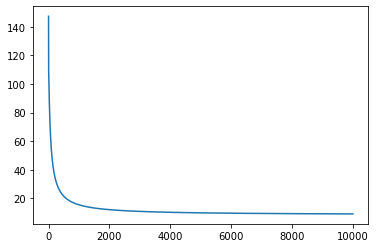

In [53]:
# batch gradient descent
eta = 0.001
maxIter = 10000

w = np.array([-10, 1.0, 1.5])

# 그림 그리기용
a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
y_new = sigmoid(a_new)

plt.figure(figsize = (10,5))
plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

cost = np.zeros(maxIter)
cost[:] = np.nan

for iter in range(maxIter):
    # gradient descent
    # w = w - eta * sum ( (pred - target) * input )
    w = w - eta*np.sum( (y_pred - t)*np.hstack([x0, x1, x2]) , axis = 0)
    
    # 예측
    a_pred = w[0] + w[1]*x1 + w[2]*x2
    y_pred = sigmoid(a_pred)
    
    # cost = - np.sum( target*log(pred) + (1 - target) * log(1 - pred) )
    cost[iter] = -np.sum(t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred))
    
# 그림 그리기용
a_new = w[0] + w[1]*xx1_new + w[2]*xx2_new
y_new = sigmoid(a_new)

plt.figure(figsize = (10,5))
plt.pcolormesh(xx1_new,xx2_new,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

plt.figure()
plt.plot(cost)

In [58]:
# x = np.array([1, 2, 3])
# y = np.array([-1, 0, 1])

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

xx,yy = np.meshgrid(x,y)

print(xx,yy)

for i in range(len(x)):
    for j in range(len(y)):
        x[i]**2 + y[j]**2

xx**2 + y**2

[[1 2 3]
 [1 2 3]
 [1 2 3]] [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
(1, -1)
(2, -1)
(3, -1)
(1, 0)
(2, 0)
(3, 0)
(1, 1)
(2, 1)
(3, 1)
